<a href="https://colab.research.google.com/github/Datalyticallab/DataHW/blob/main/%D0%94%D0%97_3_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%963_Python_%2B_SQL_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 21.0 MB/s eta 0:00:00


In [2]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [3]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [4]:
cursor = con.cursor()

In [5]:
sql = """
SELECT MAX(hire_date), MIN(hire_date) FROM employees
"""


In [6]:
cursor.execute(sql)

In [7]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

In [8]:
cursor.close()

True

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [9]:
import pandas as pd

In [24]:
cursor = con.cursor()

In [31]:
sql_2 = """
SELECT l.emp_no, s.salary, s.from_date, l.max_date
FROM (
    SELECT emp_no, max(to_date) as max_date,  max(from_date) as start_date
    FROM salaries
    GROUP BY emp_no
    ) l
JOIN salaries s
ON s.emp_no = l.emp_no
AND s.to_date = l.max_date
AND s.from_date = l.start_date

"""

In [32]:
cursor.execute(sql_2)

In [33]:
res = pd.DataFrame(cursor.fetchall(), columns = ['emp_no', 'salary', 'from_date', 'to_date'])

In [34]:
res.head(3)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


In [35]:
res.columns

Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')

In [36]:
res.shape

(300024, 4)

In [37]:
field_names = [i[0] for i in cursor.description]

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

In [38]:
cursor.close()

True

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [39]:
res.dtypes

,0
emp_no,int64
salary,int64
from_date,object
to_date,object


In [49]:
res['to_date_form'] = pd.to_datetime(res['to_date'], format='string', errors = 'coerce')
res.head(5)

,emp_no,salary,from_date,to_date,to_date_form
0,10001,88958,2002-06-22,9999-01-01,NaT
1,10002,72527,2001-08-02,9999-01-01,NaT
2,10003,43311,2001-12-01,9999-01-01,NaT
3,10004,74057,2001-11-27,9999-01-01,NaT
4,10005,94692,2001-09-09,9999-01-01,NaT


In [62]:
n_na = res['to_date_form'].isna().sum()
n_nan = res['to_date_form'].notna().sum()
print(f'Кількість значень, які рівні 9999-01-01: {n_na}, кількість значень, які не рівні 9999-01-01: {n_nan}')


Кількість значень, які рівні 9999-01-01: 240124, кількість значень, які не рівні 9999-01-01: 59900


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

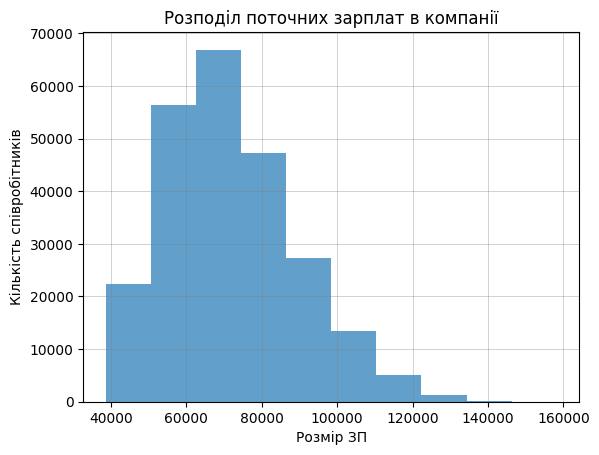

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(res[res.to_date_form.isna()].salary, alpha = .7)
plt.xlabel('Розмір ЗП');
plt.ylabel('Кількість співробітників')
plt.title('Розподіл поточних зарплат в компанії')
plt.grid(color='gray',  linewidth=0.5, alpha = .5)
plt.show();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [76]:
con.close()